In [1]:
import os
import sys
import random
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)
from mejiro.utils import util

# set matplotlib style
# plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

# set HWO directory
hwo_dir = os.path.join(repo_dir, 'hwo')

In [2]:
logm_low = 5
logm_high = 11

In [3]:
def get_detectable_subhalo_params(detectable_subhalos):
    """
    Returns the redshift, mass, and concentration of detectable subhalos
    """
    z_list, m_list, c_list = [], [], []
    for halo_list in detectable_subhalos:
        for z, m, c in halo_list:
            z_list.append(z)
            m_list.append(m)
            c_list.append(c)
    return z_list, m_list, c_list

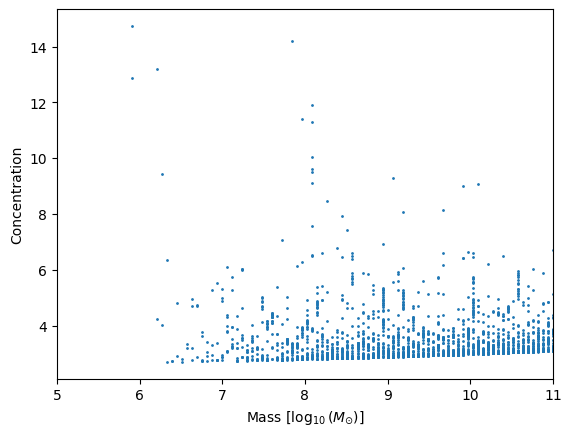

In [4]:
data_dir = '/data/bwedig/mejiro'
save_dir = os.path.join(data_dir, 'hwo_subhalo_detection_compare')
hlwas_detectable_halos = util.unpickle_all(save_dir, 'detectable_halos_', '.pkl')
hlwas_z_list, hlwas_m_list, hlwas_c_list = get_detectable_subhalo_params(hlwas_detectable_halos)

plt.scatter(np.log10(hlwas_m_list), hlwas_c_list, s=1, label='HLWAS')
plt.xlabel(r'Mass [$\log_{10}(M_{\odot})$]')
plt.ylabel('Concentration')
plt.xlim(logm_low, logm_high)
plt.show()

In [5]:
def get_percent_detectable(m_list, detectable_halos):
    percent_det = []
    mlog10_list = [np.log10(m) for m in np.logspace(logm_low, logm_high, 100)]
    m_list = [np.log10(m) for m in m_list]

    for m in mlog10_list:
        count = np.sum(np.array(m_list) == m)
        percent_det.append(count / len(detectable_halos))

    return percent_det

In [6]:
hlwas_percent_detectable = get_percent_detectable(hlwas_m_list, hlwas_detectable_halos)

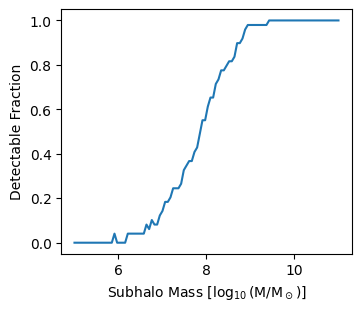

In [7]:
mlog10_list = [np.log10(m) for m in np.logspace(logm_low, logm_high, 100)]

plt.figure(figsize=(3.5, 3), constrained_layout=True)
plt.plot(mlog10_list, hlwas_percent_detectable, color='C0')
plt.ylabel('Detectable Fraction')
plt.xlabel(r'Subhalo Mass [$\log_{10}($M/M$_\odot)$]')
# plt.savefig(os.path.join(figure_dir, 'subhalo_detection_compare.png'))
plt.show()